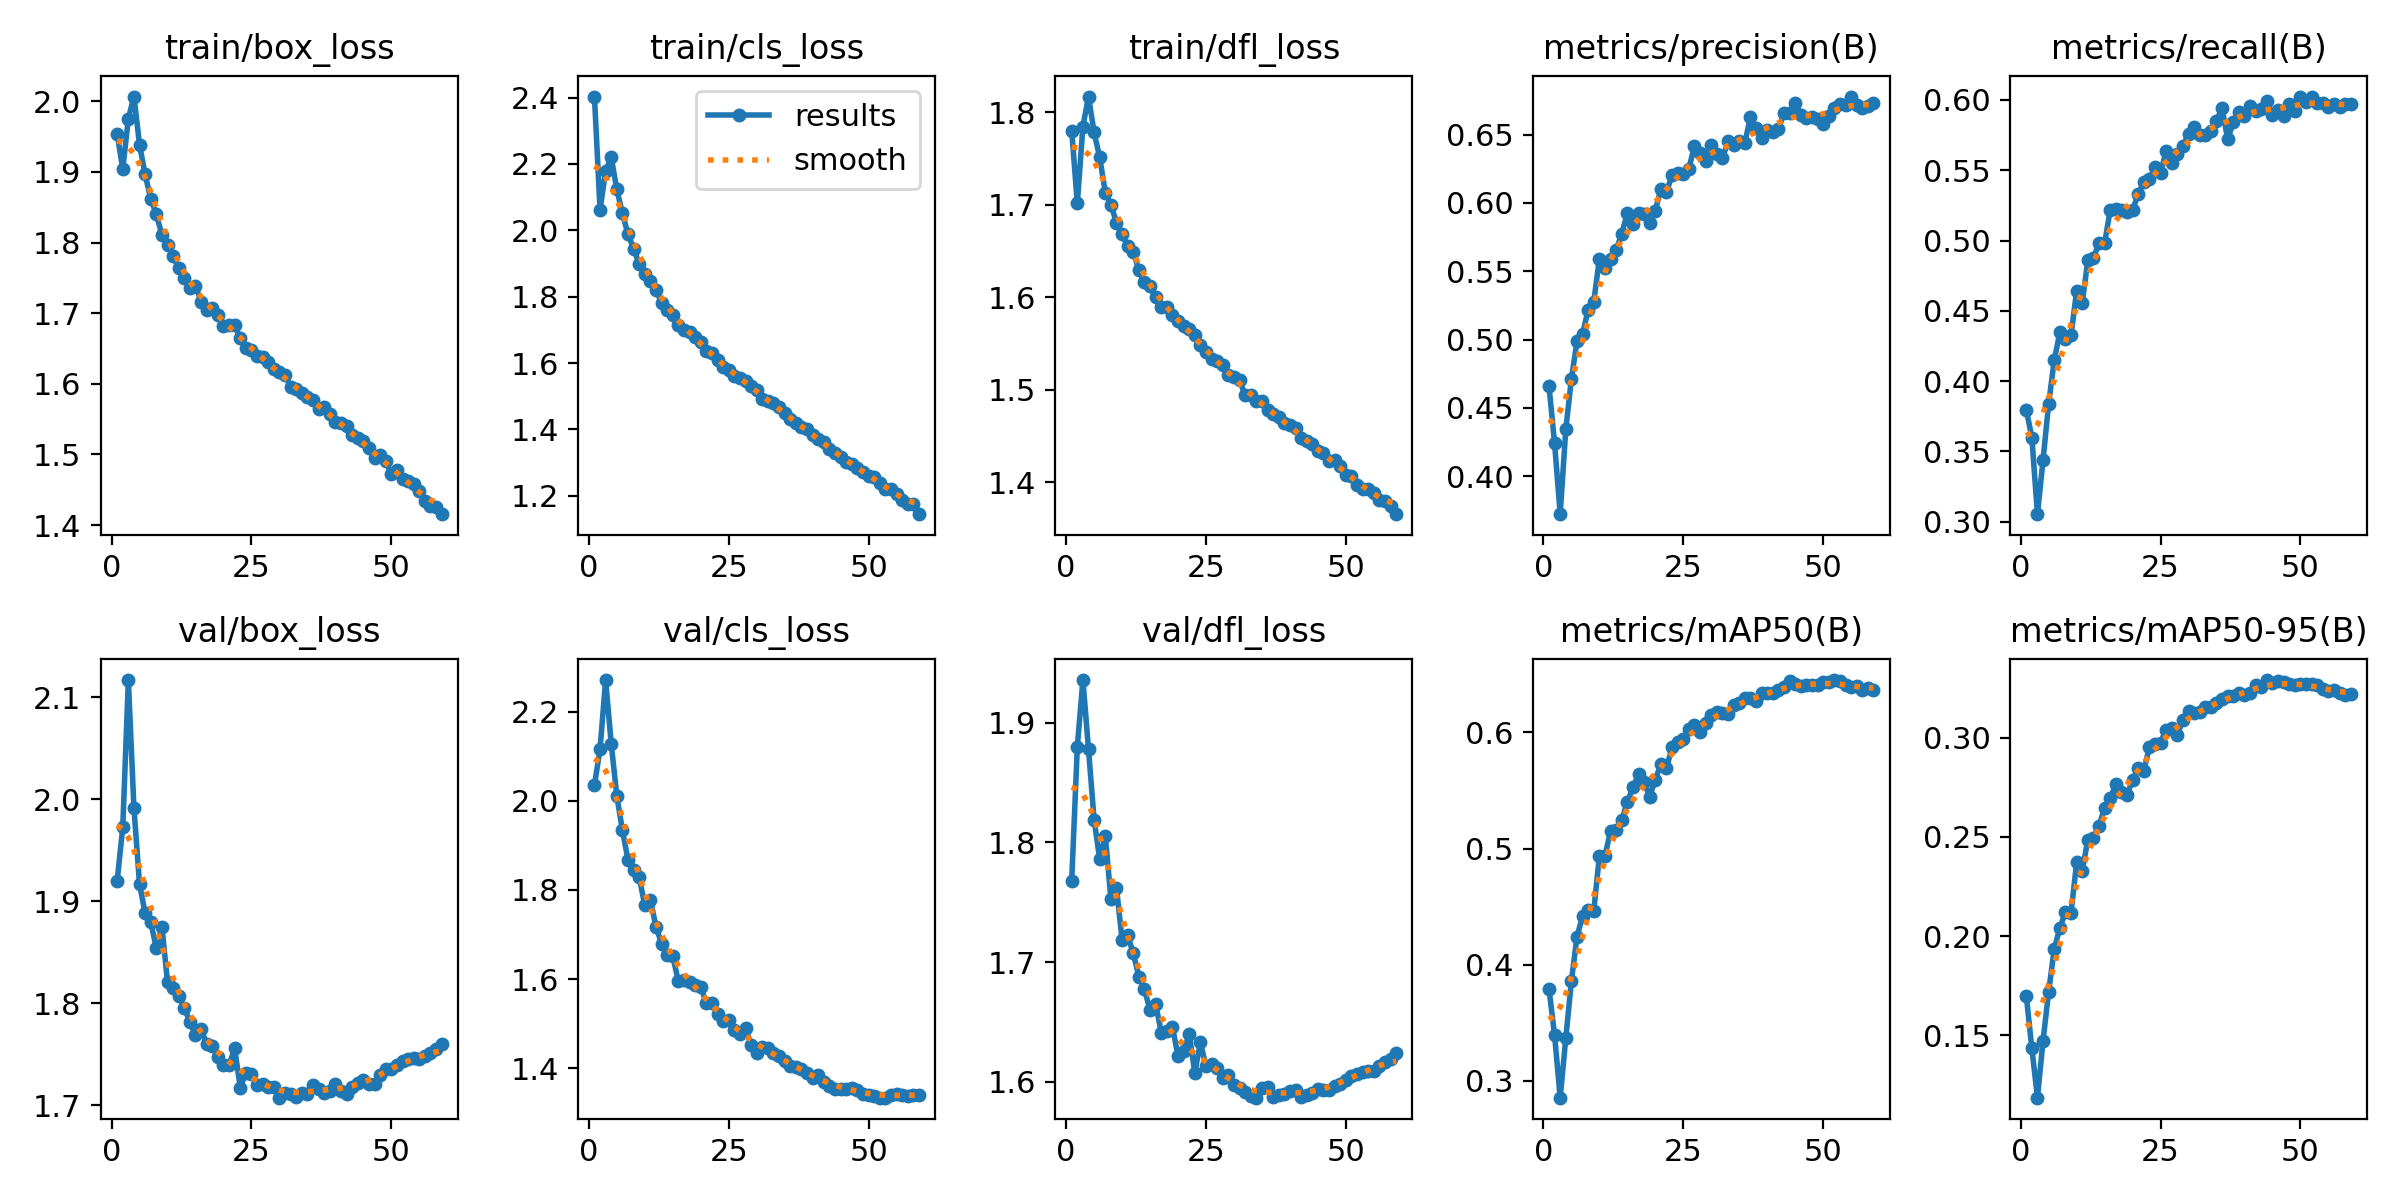

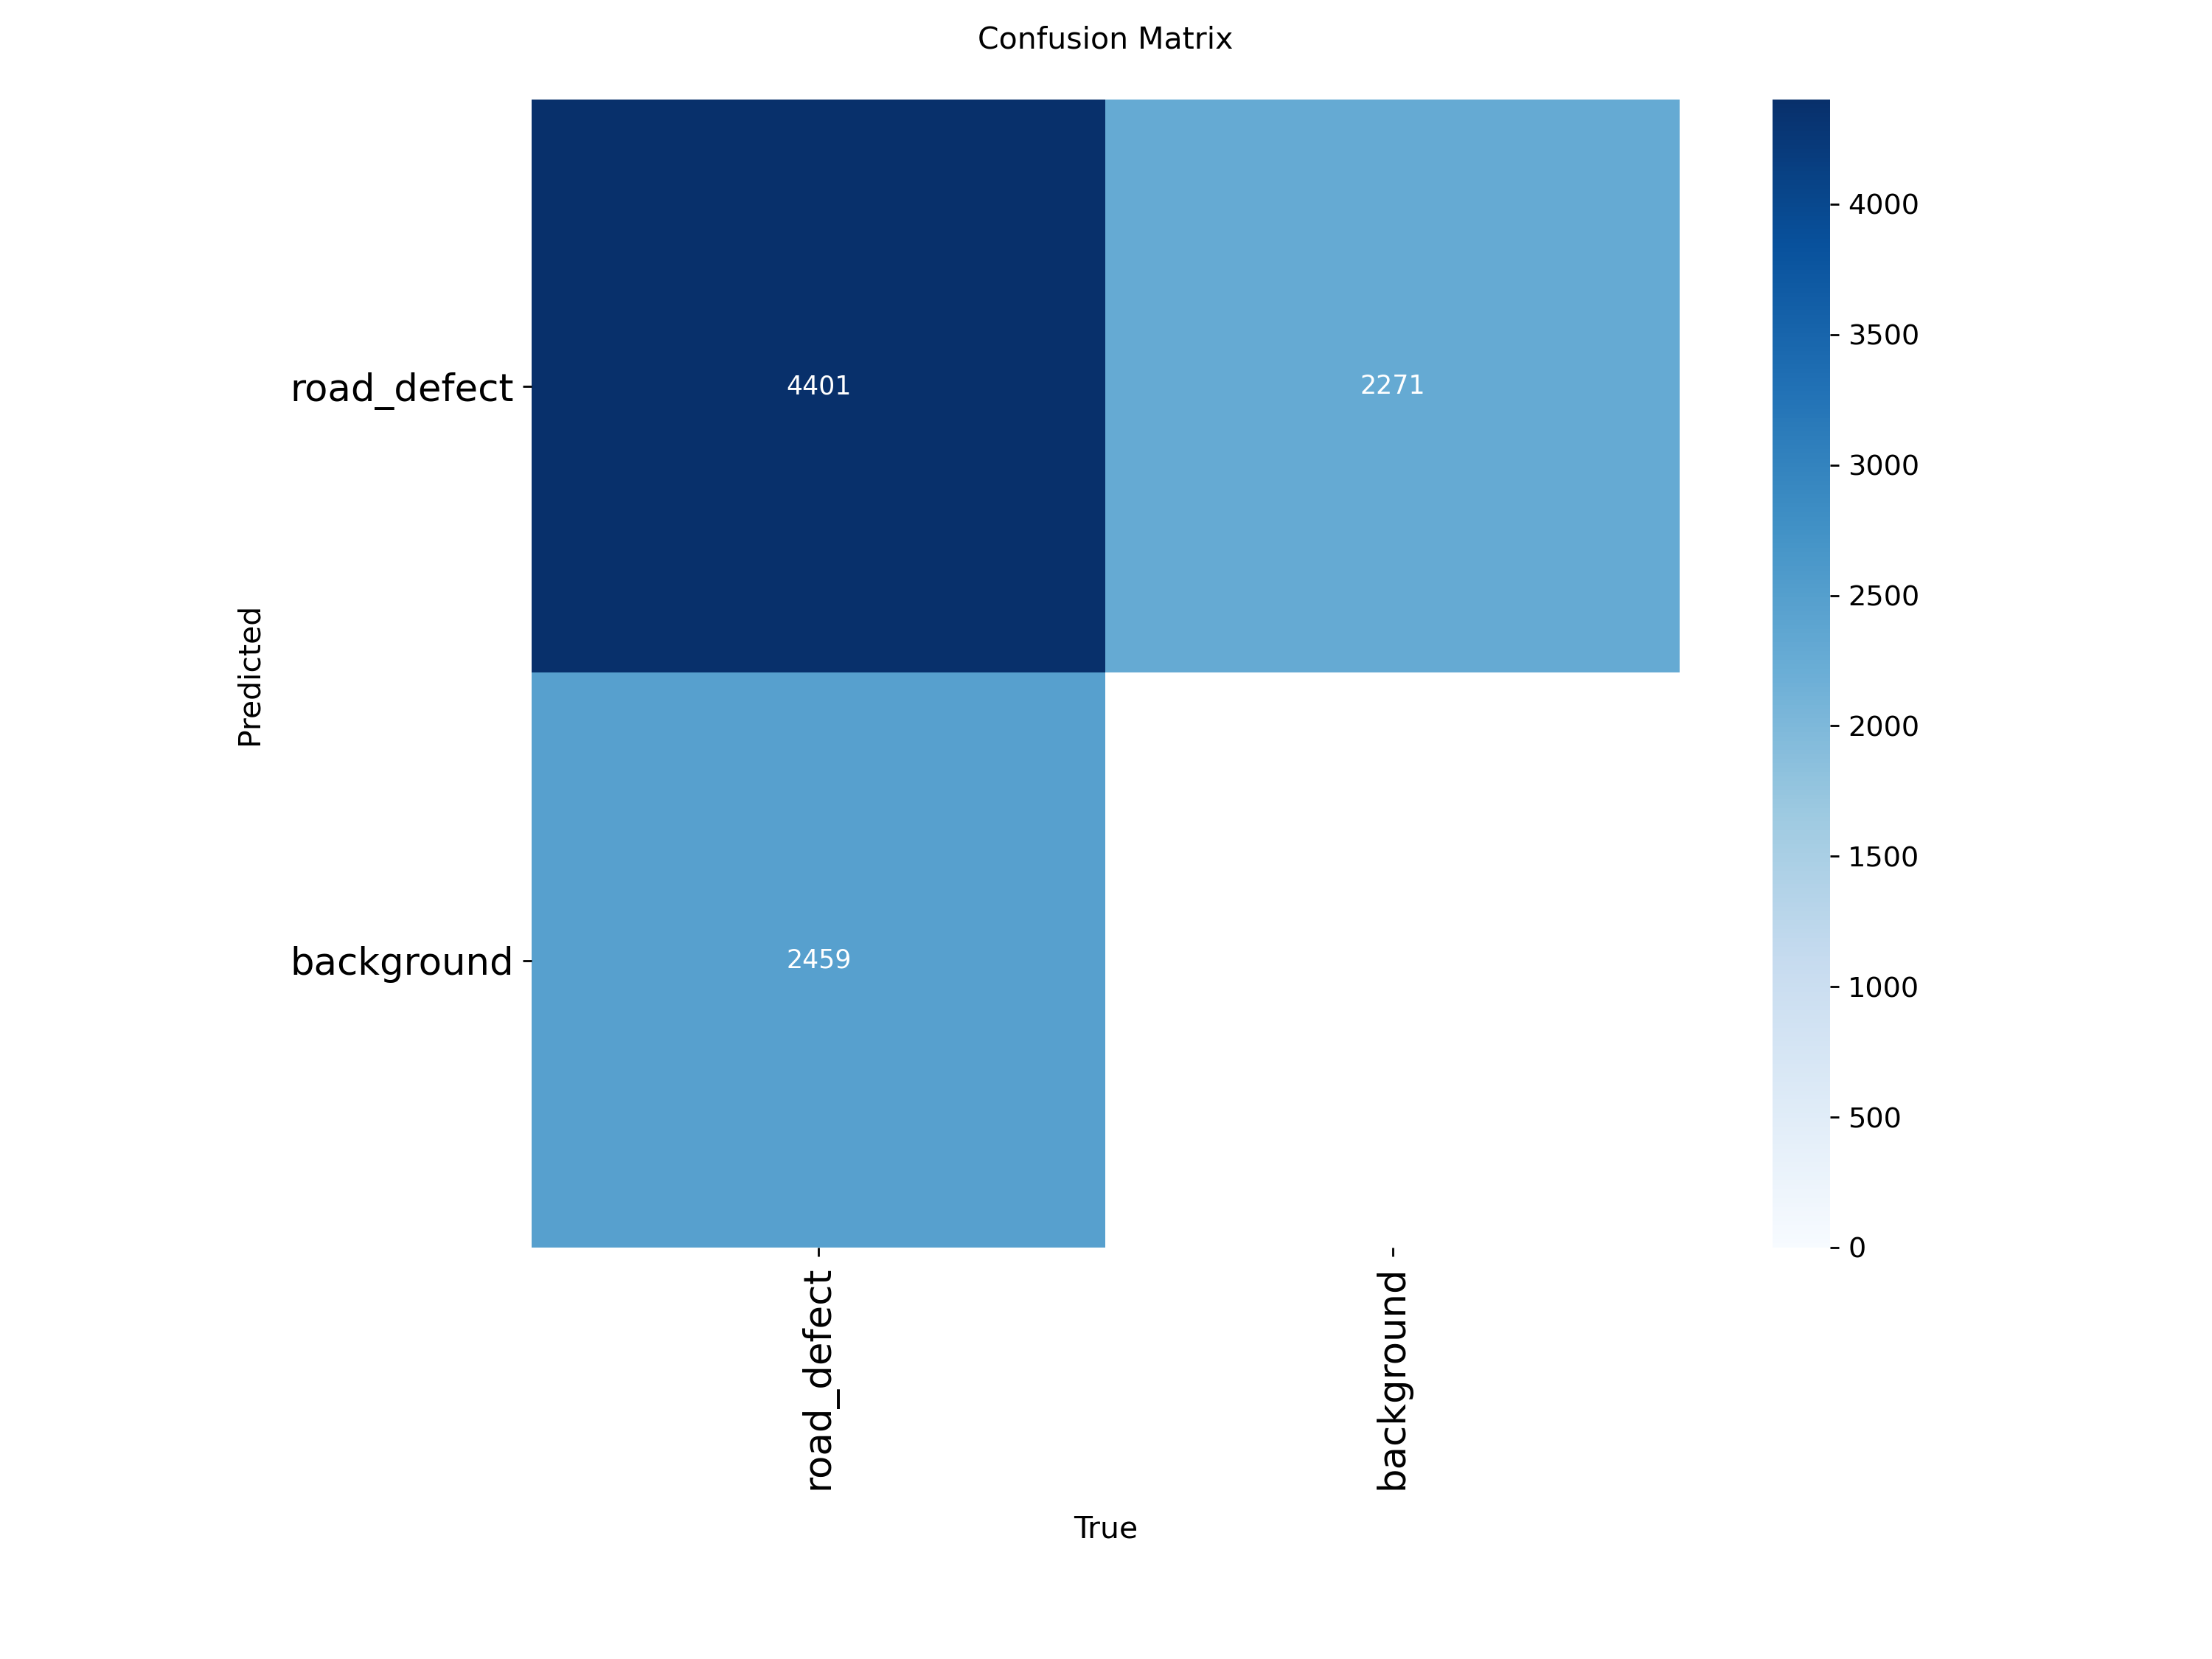

In [1]:
from IPython.display import Image, display
from pathlib import Path

RUN_DIR = Path("../../runs/three_country_training/road_defect_binary/yolov8s")

display(Image(filename=str(RUN_DIR / "results.png")))
display(Image(filename=str(RUN_DIR / "confusion_matrix.png")))


In [2]:
import pandas as pd

results_csv = RUN_DIR / "results.csv"
assert results_csv.exists(), "results.csv not found!"

df = pd.read_csv(results_csv)
df.tail()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
54     55  8310.47         1.44775         1.20609         1.38786   
55     56  8459.75         1.43473         1.18706         1.38096   
56     57  8608.94         1.42691         1.17433         1.38005   
57     58  8758.06         1.42570         1.17637         1.37440   
58     59  8907.45         1.41542         1.14442         1.36548   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
54               0.67793            0.59461           0.63922   
55               0.67191            0.59736           0.63972   
56               0.66991            0.59494           0.63655   
57               0.67130            0.59721           0.63825   
58               0.67287            0.59698           0.63692   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
54              0.32355       1.74512       1.34090       1.60937  0.007089   
55              0.32387       1.74822       1.34028       1.61283  0.006664   
56              0.32247       1.75140       1.33822       1.61638  0.006240   
57              0.32158       1.75569       1.33935       1.61882  0.005816   
58              0.32182       1.76031       1.33967       1.62397  0.005391   

      lr/pg1    lr/pg2    lr/pg3    lr/pg4    lr/pg5    lr/pg6    lr/pg7  
54  0.002363  0.007089  0.002363  0.007089  0.002363  0.007089  0.002363  
55  0.002221  0.006664  0.002221  0.006664  0.002221  0.006664  0.002221  
56  0.002080  0.006240  0.002080  0.006240  0.002080  0.006240  0.002080  
57  0.001939  0.005816  0.001939  0.005816  0.001939  0.005816  0.001939  
58  0.001797  0.005391  0.001797  0.005391  0.001797  0.005391  0.001797

In [3]:
final = df.iloc[-1]

print("Final metrics:")
print(f"Precision: {final['metrics/precision(B)']:.4f}")
print(f"Recall:    {final['metrics/recall(B)']:.4f}")
print(f"mAP@0.5:   {final['metrics/mAP50(B)']:.4f}")
print(f"mAP@0.5:0.95: {final['metrics/mAP50-95(B)']:.4f}")

Final metrics:
Precision: 0.6729
Recall:    0.5970
mAP@0.5:   0.6369
mAP@0.5:0.95: 0.3218


In [4]:
# Predict
from ultralytics import YOLO
model = YOLO("../../runs/three_country_training/road_defect_binary/yolov8s/weights/best.pt")

model.predict(
    source="../../data/test1/India/images",
    conf=0.2,
    save=True,
    project="../../runs/three_country_inference/road_defect_binary/yolov8s",
    name="predictions_test"
)



image 1/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000006.jpg: 640x640 2 road_defects, 5.1ms
image 2/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000009.jpg: 640x640 2 road_defects, 5.1ms
image 3/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000015.jpg: 640x640 (no detections), 5.4ms
image 4/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000021.jpg: 640x640 (no detections), 5.0ms
image 5/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000025.jpg: 640x640 (no detections), 5.1ms
image 6/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000029.jpg: 640x640 (no detections), 5.4ms
image 7/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../dat

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'road_defect'}
 obb: None
 orig_img: array([[[222, 184, 150],
         [221, 183, 149],
         [221, 183, 149],
         ...,
         [205, 163, 128],
         [205, 163, 128],
         [205, 163, 128]],
 
        [[221, 183, 149],
         [221, 183, 149],
         [220, 182, 148],
         ...,
         [205, 163, 128],
         [205, 163, 128],
         [205, 163, 128]],
 
        [[220, 182, 148],
         [220, 182, 148],
         [219, 181, 147],
         ...,
         [205, 163, 128],
         [205, 163, 128],
         [205, 163, 128]],
 
        ...,
 
        [[ 83,  87,  88],
         [ 81,  85,  86],
         [ 79,  83,  84],
         ...,
         [ 61,  60,  46],
         [ 61,  60,  46],
         [ 60,  59,  45]],
 
        [[ 80,  84,  85],
         [ 81,  85,  86],
         [ 81,  85,  86],
         ...,
         [ 60

Total test images predicted: 969


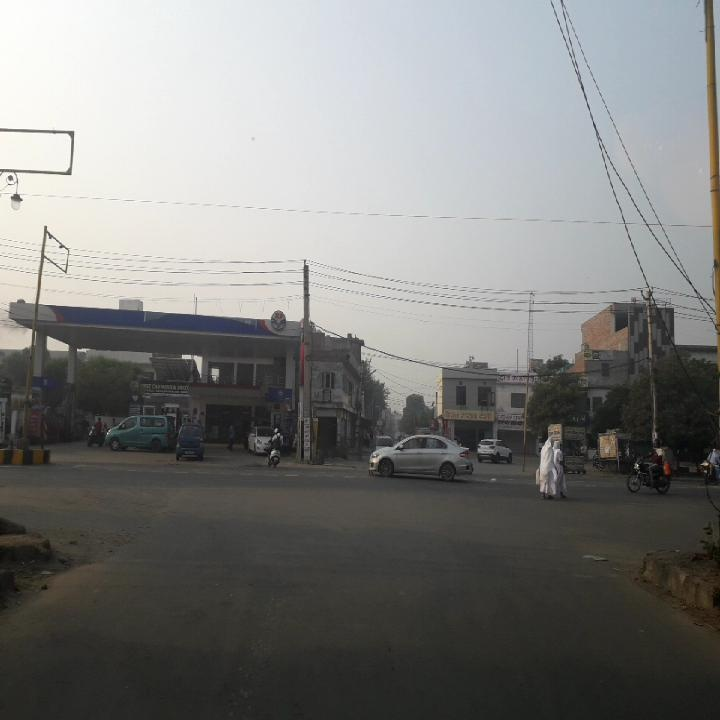

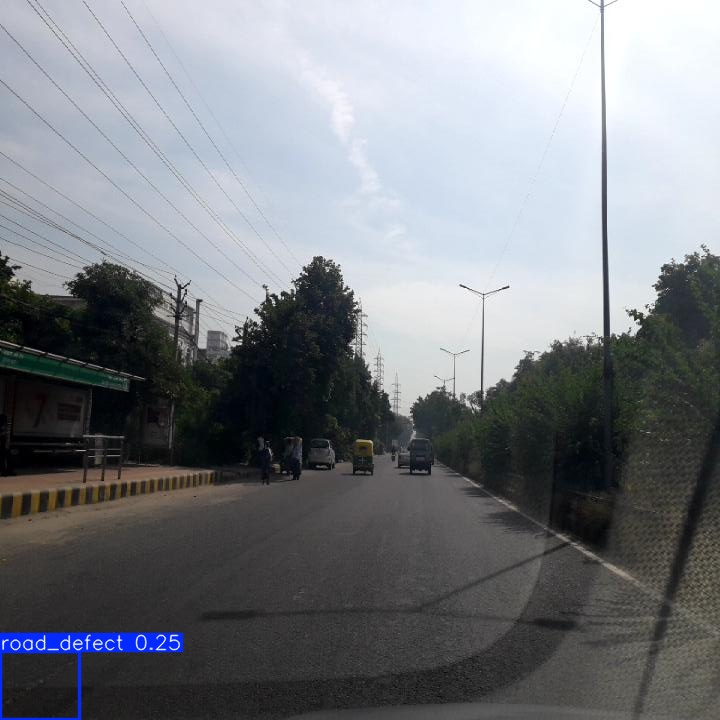

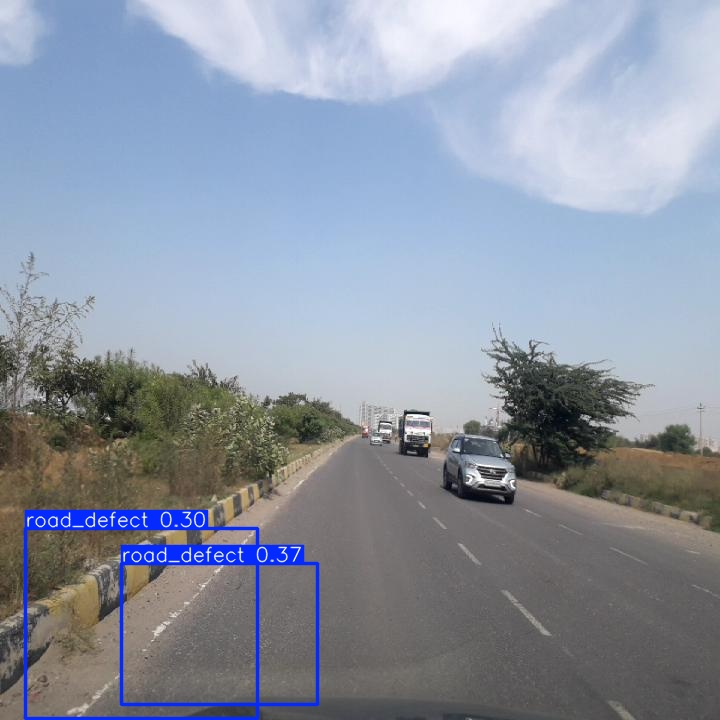

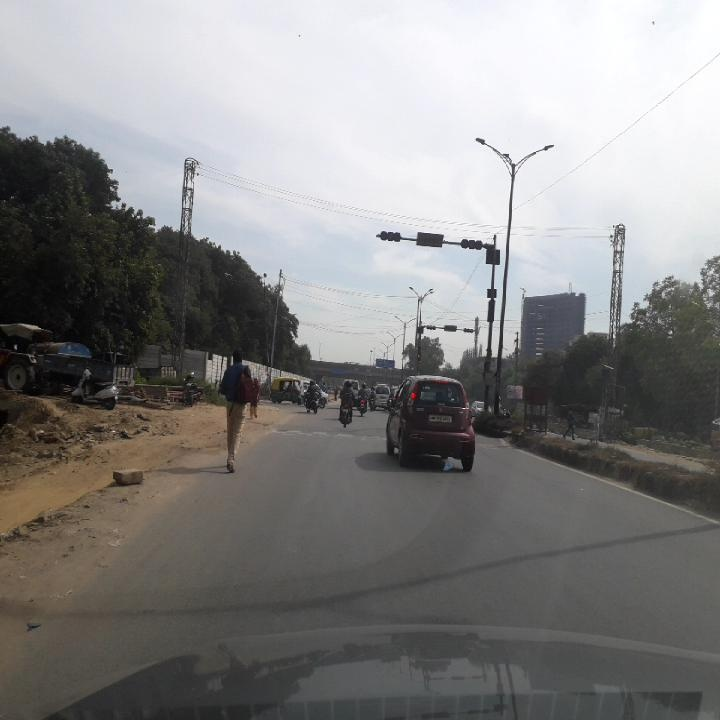

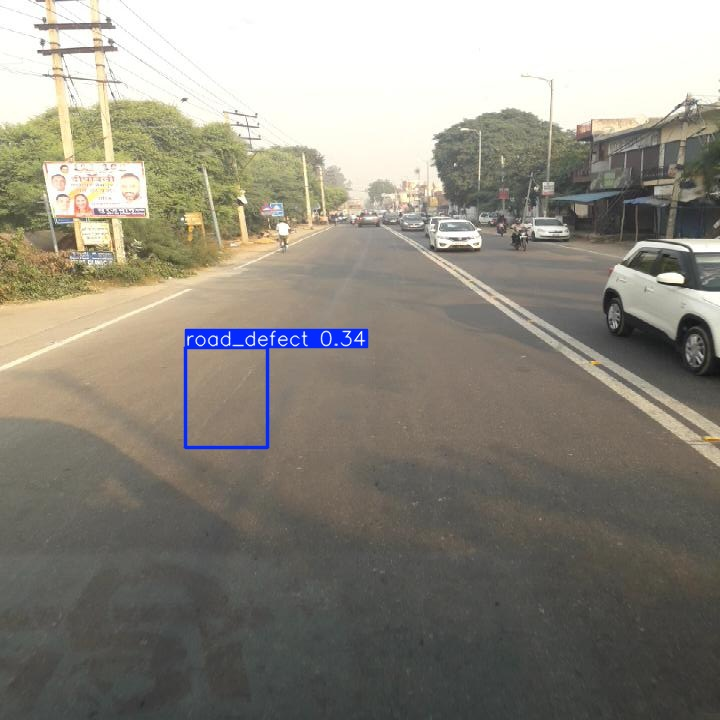

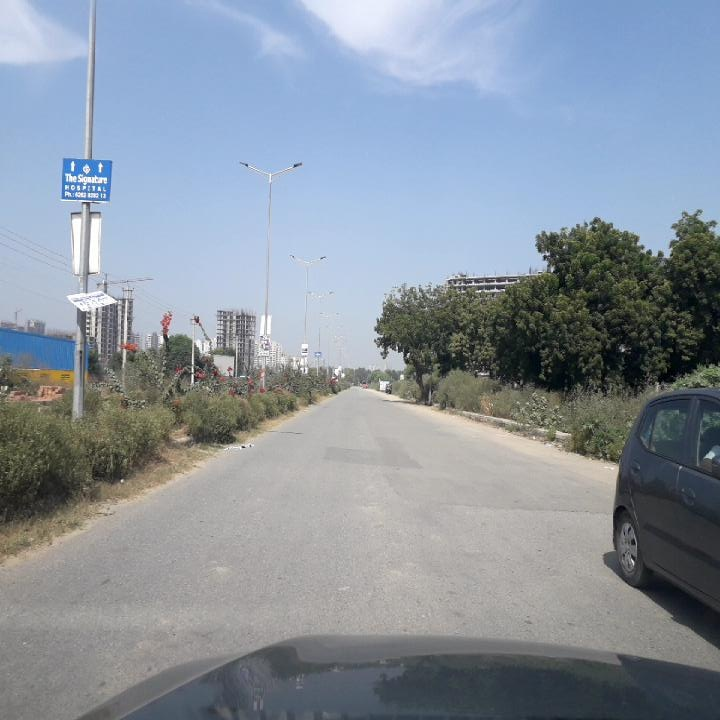

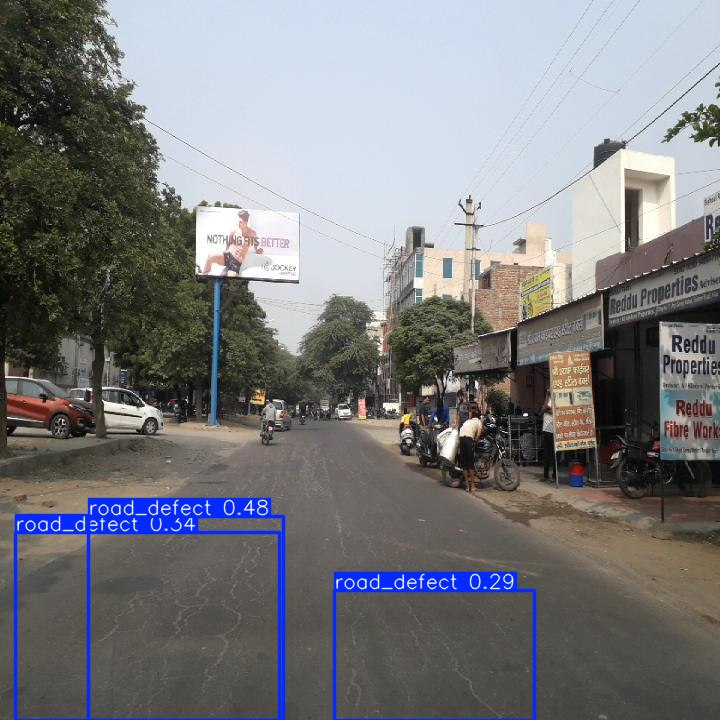

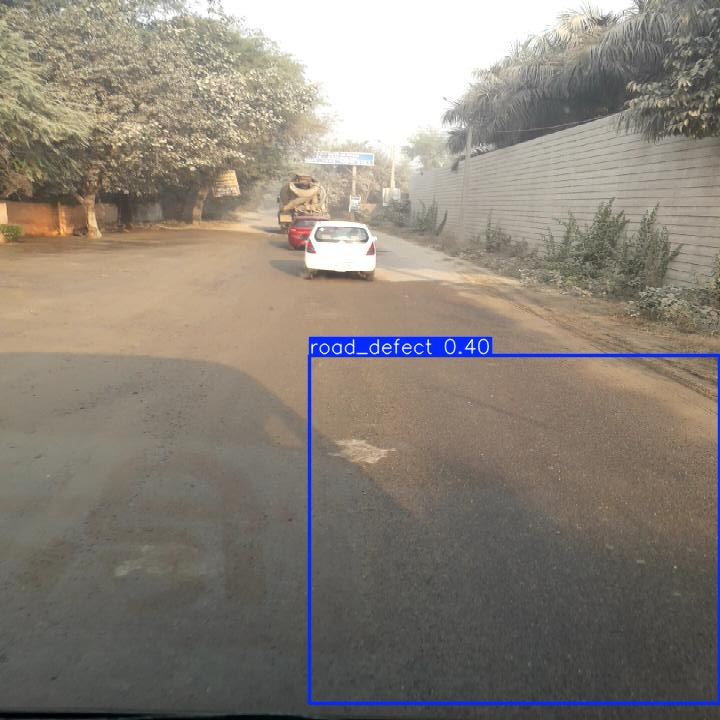

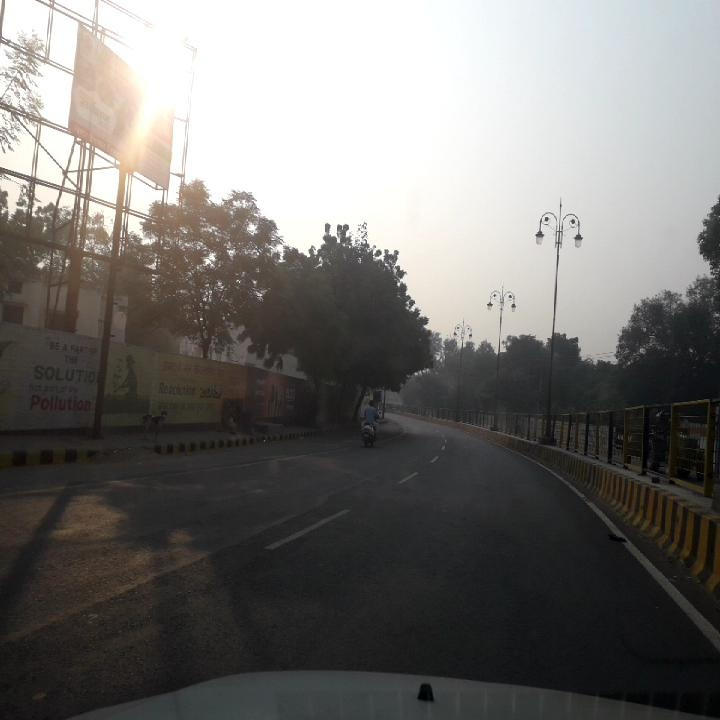

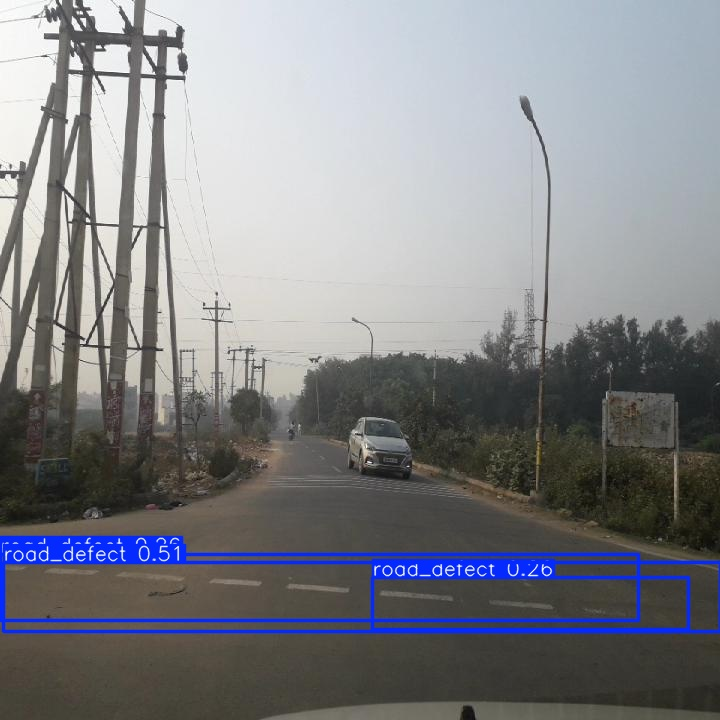

In [8]:
from pathlib import Path
from IPython.display import Image, display
import random

PRED_TEST_DIR = Path("../../runs/three_country_inference/road_defect_binary/yolov8s/predictions_test")

images = list(PRED_TEST_DIR.glob("*.jpg"))
print(f"Total test images predicted: {len(images)}")

for img in random.sample(images, 10):
    display(Image(filename=str(img)))